# Rozpoznawanie ręcznie pisanych cyfr

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Pracę rozpoczniemy od pobrania zbioru MNIST, zawierającego 70 tyś. przykładów ręcznie pisanych cyfr 0-9 w formie obrazków 28x28 pikseli. Wykorzystamy w tym celu funkcję `fetch_openml`, która pobera dane z serwisu [https://www.openml.org/](www.openml.org).

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

Dane zawarte są w macierzy `data`, a etykiety w wektorze `target`

In [5]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


Wyświetlmy 25 losowo wybranych przykładów:

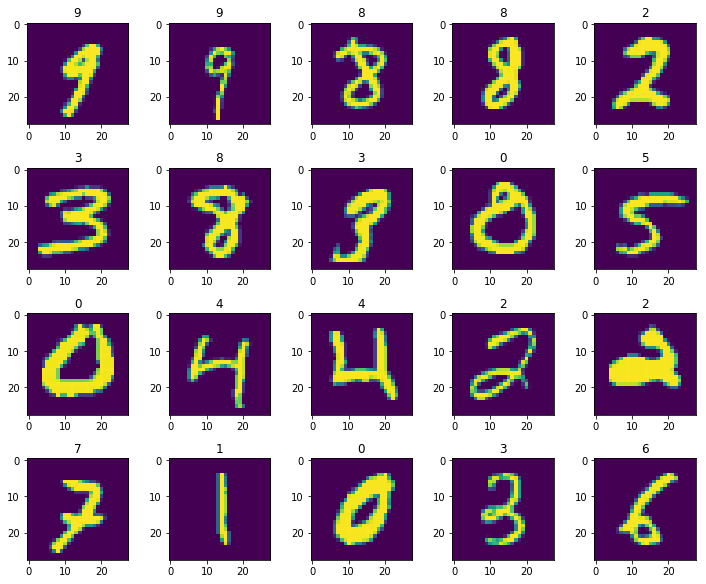

In [6]:
plt.figure(figsize=(10,10)) #zwiększ domyślny rozmiar wyświetlanego obrazu
for k, i in enumerate(np.random.choice(mnist.data.shape[0], size=20, replace=False)):
    plt.subplot(5, 5, k+1) #siatka 5x5, ostatni argument to pozycja na siatce
    plt.imshow(mnist.data[i].reshape(28,28))
    plt.title(str(mnist.target[i]))    
plt.tight_layout() #żeby tytuły obrazków były widoczne
plt.show()

Poniższy kod dzieli losow dane na zbiory: uczący, walidujący i testowy w proporcji 70%/10%/20%. Wykorzystaj tak podzielone dane w dalszych krokach.

In [7]:
n, p = mnist.data.shape
n_train = int(.7*n)
n_validation = int(.1*n)
indices = np.random.permutation(n)
train_indices = indices[:n_train]
validation_indices = indices[n_train:n_train+n_validation]
test_indices = indices[n_train+n_validation:]
X_train, y_train = mnist.data[train_indices,:], mnist.target[train_indices]
X_validation, y_validation = mnist.data[validation_indices,:], mnist.target[validation_indices]
X_test, y_test = mnist.data[test_indices,:], mnist.target[test_indices]

Stworzymy prosty model regresji logistycznej, uczony na surowych pikselach obrazków.

In [8]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='sag')
model.fit(X_train[:5000,:], y_train[:5000])
print("Accuracy na zbiorze walidującym", model.score(X_validation, y_validation))

Spójrz na [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix): kolumny odpowiadają prawdziym etykietom, a wiersze etykietom przewidzianym.

In [ ]:
from sklearn.metrics import confusion_matrix
labels = sorted(set(y_validation))
y_pred = model.predict(X_validation)
print(*labels)
print(confusion_matrix(y_validation, y_pred, labels=labels))

Wyświetl 25 przykładów, które zostały niepoprawnie zaetykietowane. 

In [ ]:
...

## Zadanie do samodzielnego wykonania

Zbuduj jak najlepszy klasyfikator: przetestuj różne sposoby regularyzacji i normalizacji wejścia. [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](Dokumentacja klasy `LogisticRegression`)

In [ ]:
... # próba 1

In [ ]:
... # próba 2

In [ ]:
...

In [ ]:
... # próba N

Wybierz najlepszy z uzyskanych klasyfikatorów i przetesuj go na zbiorze tesotwym.

In [ ]:
print("Accuracy na zbiorze testowym", model.score(X_test, y_test))